In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [3]:
df = pd.read_csv('/Users/hitteshkumarm/Desktop/COLLEGE/FeyNN Labs/RS_Session_258_AU_1241_3.csv')
df.head(5)

,Category,City/Highway,Charging Stations
0,City,Chandigarh,48
1,City,Delhi,94
2,City,Rajasthan,49
3,City,Karnataka,65
4,City,Jharkhand,30


In [4]:
# Data Cleaning
df = df[~df['Category'].str.contains('Total')]  # Exclude "Total" and "Grand Total" rows
df['Charging Stations'] = pd.to_numeric(df['Charging Stations'], errors='coerce')  # Convert to numeric

In [5]:
# Handle missing values if any (You can customize this part as needed)
df['Charging Stations'].fillna(0, inplace=True)

In [6]:
# Step 2: Data Analysis
# Descriptive Statistics
city_stats = df[df['Category'] == 'City']['Charging Stations'].describe()
highway_stats = df[df['Category'] == 'Highway']['Charging Stations'].describe()
print("City Stats:\n", city_stats)
print("Highway Stats:\n", highway_stats)

City Stats:
 count     9.000000
mean     44.222222
std      26.342825
min       9.000000
25%      30.000000
50%      48.000000
75%      57.000000
max      94.000000
Name: Charging Stations, dtype: float64
Highway Stats:
 count     4.000000
mean     20.250000
std       9.429563
min       9.000000
25%      15.000000
50%      20.500000
75%      25.750000
max      31.000000
Name: Charging Stations, dtype: float64


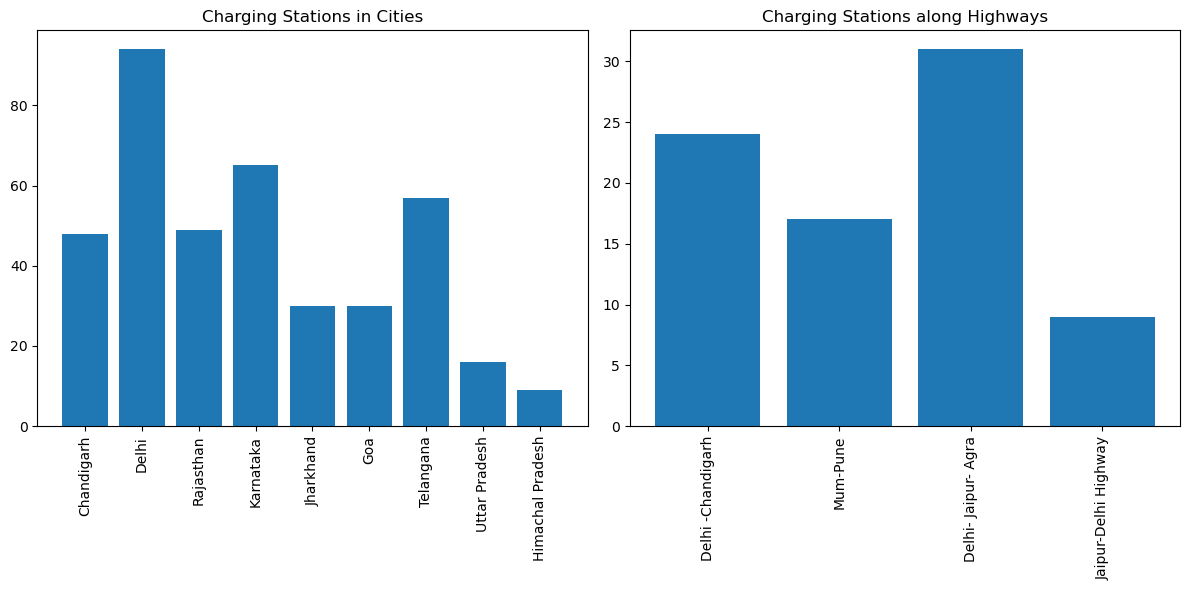

In [16]:
# Visualization
city_data = df[df['Category'] == 'City']
highway_data = df[df['Category'] == 'Highway']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(city_data['City/Highway'], city_data['Charging Stations'])
plt.xticks(rotation=90)
plt.title('Charging Stations in Cities')

plt.subplot(1, 2, 2)
plt.bar(highway_data['City/Highway'], highway_data['Charging Stations'])
plt.xticks(rotation=90)
plt.title('Charging Stations along Highways')

plt.tight_layout()
plt.show()

/var/folders/9j/5wlfmhp575qfg72zsmdt2q3c0000gn/T/ipykernel_1150/3577327038.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


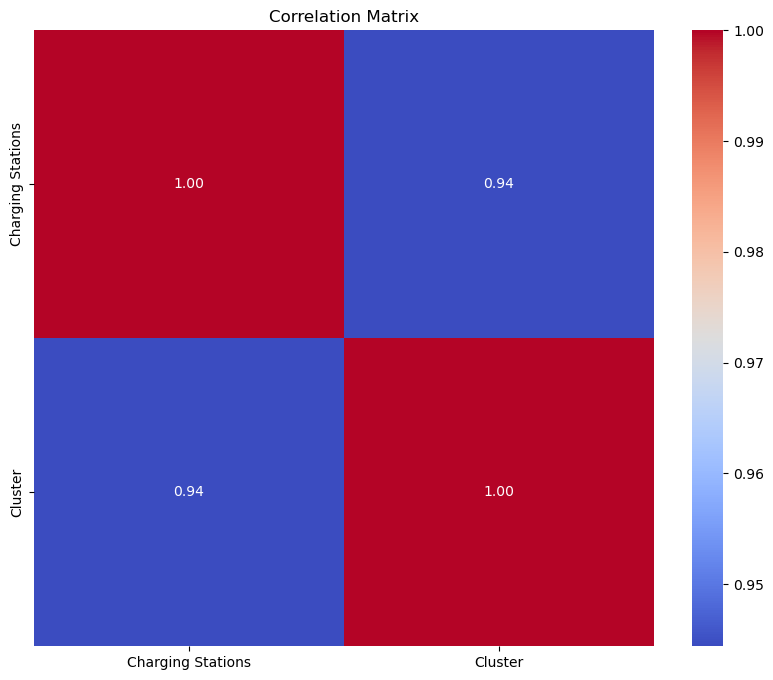

In [23]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [18]:
# Step 3: Clustering Algorithm
# Feature Selection and Scaling
X = df[['Charging Stations']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means Clustering
k = 3  # You can adjust the number of clusters as needed
n_init = 10  # The number of times the k-means algorithm will be run with different centroid seeds
kmeans = KMeans(n_clusters=k, random_state=0, n_init=n_init)
df['Cluster'] = kmeans.fit_predict(X_scaled)

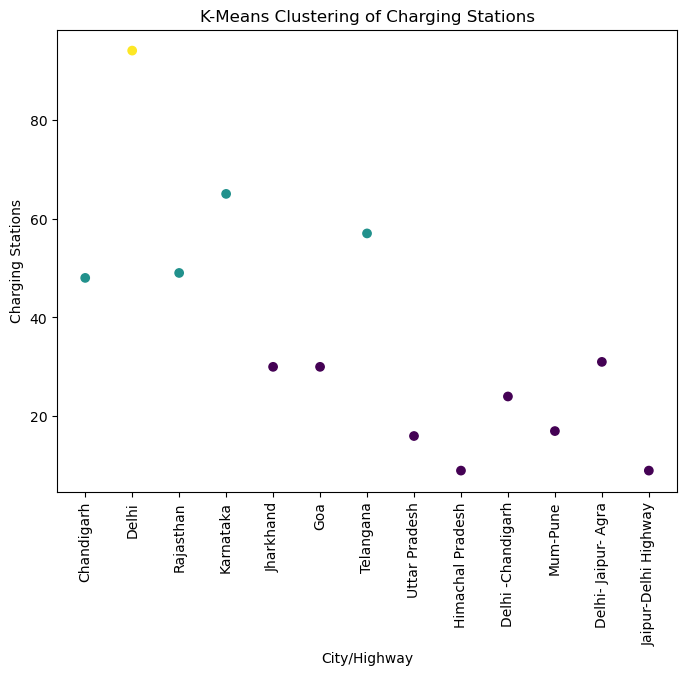

In [20]:
# Step 4: Visualization of Clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['City/Highway'], df['Charging Stations'], c=df['Cluster'], cmap='viridis')
plt.xlabel('City/Highway')
plt.ylabel('Charging Stations')
plt.title('K-Means Clustering of Charging Stations')
plt.xticks(rotation=90)
plt.show()